In [3]:
#importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_excel('/content/Marketing Team Data.xlsx')

df.head()


,campaign ID,Campaign Name,Audience,Age,Geography,Reach,Impressions,Frequency,Clicks,Unique Clicks,Unique Link Clicks (ULC),Click-Through Rate (CTR in %),Unique Click-Through Rate (Unique CTR in %),Amount Spent in INR,Cost Per Click (CPC),Cost per Result (CPR),@dropdown,@dropdown.1
0,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,25-34,"Group 1 (Australia, Canada, United Kingdom, Gh...",11387,23283,2.044700,487,406,180,2.091655,3.565469,1092.24,2.242790,6.07,NaN,NaN
1,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,35-44,"Group 1 (Australia, Canada, United Kingdom, Gh...",8761,15683,1.790092,484,376,154,3.086144,4.291748,835.46,1.726165,5.43,NaN,NaN
2,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,45-54,"Group 1 (Australia, Canada, United Kingdom, Gh...",2867,6283,2.191489,198,145,65,3.151361,5.057551,319.38,1.613038,4.91,NaN,NaN
3,Campaign 1,SHU_6 (Educators and Principals),Educators and Principals,55-64,"Group 1 (Australia, Canada, United Kingdom, Gh...",889,1890,2.125984,49,40,21,2.592593,4.499438,86.25,1.760117,4.11,NaN,NaN
4,Campaign 2,SHU3_ (Students Apart from India and US),Students,18-24,"Group 2 (Australia, Canada, United Kingdom, Gh...",29675,39161,1.319663,2593,1994,1095,6.621384,6.719461,1193.94,0.460448,1.09,NaN,NaN


In [5]:
# Dropping last two cloumns because of no use
df = df.drop(columns=['@dropdown', '@dropdown.1'])

# 1. Reach Across Age Groups (Bar Chart):
This bar chart shows how many people were reached in each age group. It helps us understand which age groups were targeted more by the marketing campaigns. From the chart, we can identify the most reached age group, which helps in evaluating the audience coverage of ads.

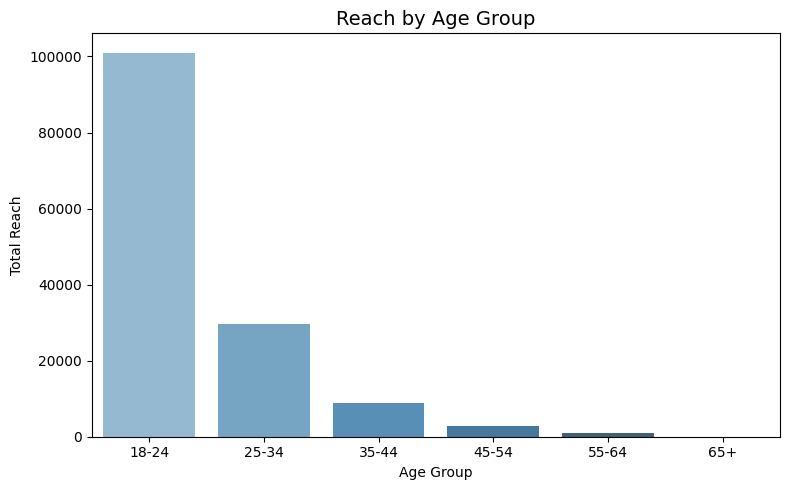

The bar chart clearly shows that the 18–24 age group had the highest reach, meaning this group saw the ads the most. This is followed by the 25–34 age group, but with a significantly lower reach. Other age groups like 35–44 and older had very low exposure. This suggests that the company's marketing efforts were mainly focused on younger audiences, especially people aged 18 to 24, which may reflect their primary target market.



In [6]:
# Group by Age and sum the Reach
age_reach = df.groupby('Age')['Reach'].sum().reset_index()

# Sort Age groups (optional: manually sort if needed)
age_order = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
age_reach['Age'] = pd.Categorical(age_reach['Age'], categories=age_order, ordered=True)
age_reach = age_reach.sort_values('Age')

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(data=age_reach, x='Age', y='Reach', palette='Blues_d')
plt.title('Reach by Age Group', fontsize=14)
plt.xlabel('Age Group')
plt.ylabel('Total Reach')
plt.tight_layout()
plt.show()
print("""The bar chart clearly shows that the 18–24 age group had the highest reach, meaning this group saw the ads the most. This is followed by the 25–34 age group, but with a significantly lower reach. Other age groups like 35–44 and older had very low exposure. This suggests that the company's marketing efforts were mainly focused on younger audiences, especially people aged 18 to 24, which may reflect their primary target market.
""")

# 2. CTR (%) Across Campaigns (Bar Chart):
This bar chart compares the Click-Through Rate (CTR) for each campaign. CTR tells us how many people clicked on the ad out of those who saw it. A higher CTR means better performance. By comparing campaigns, we can see which ones engaged the audience most effectively.

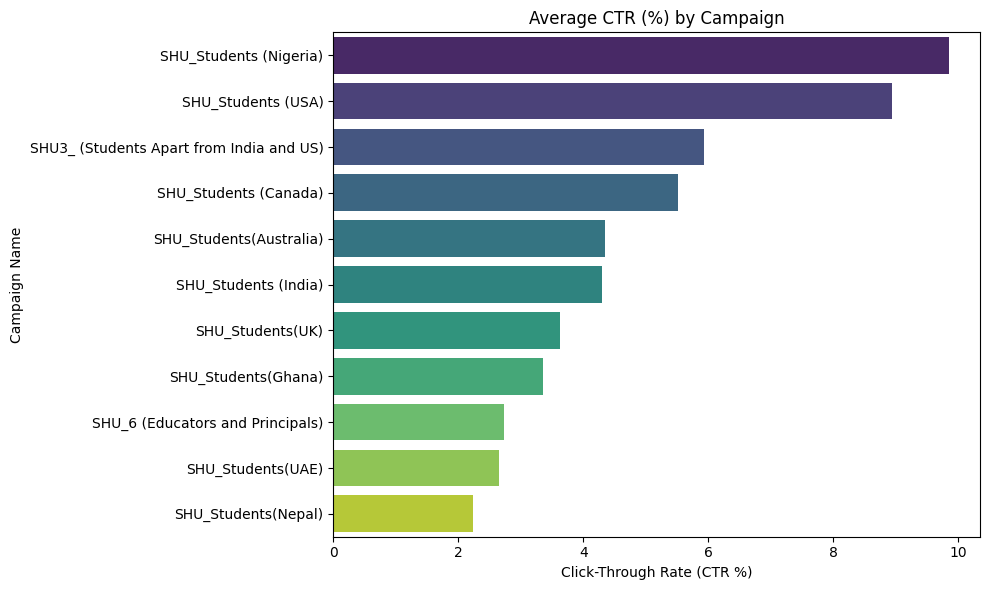

This bar chart shows how well each campaign got people to click on ads (that’s the CTR).

The best results came from campaigns targeting students in Nigeria and the USA, with CTRs above 8.5% — they clearly grabbed attention!

Mid-level performers included Canada, Australia, and India, with decent CTRs around 4.5% to 6%.

The lowest CTRs came from campaigns for Nepal, UAE, Ghana, UK, and Educators & Principals, meaning these ads didn’t attract much interest.

Overall, ads worked best on students in Nigeria and the US, and worst on educators and Nepali students.


In [7]:
# Group by Campaign Name and calculate average CTR
ctr_by_campaign = df.groupby("Campaign Name")["Click-Through Rate (CTR in %)"].mean().reset_index()

# Sort values for better visualization
ctr_by_campaign = ctr_by_campaign.sort_values(by="Click-Through Rate (CTR in %)", ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=ctr_by_campaign, x="Click-Through Rate (CTR in %)", y="Campaign Name", palette="viridis")
plt.title("Average CTR (%) by Campaign")
plt.xlabel("Click-Through Rate (CTR %)")
plt.ylabel("Campaign Name")
plt.tight_layout()
plt.show()
print("""This bar chart shows how well each campaign got people to click on ads (that’s the CTR).

The best results came from campaigns targeting students in Nigeria and the USA, with CTRs above 8.5% — they clearly grabbed attention!

Mid-level performers included Canada, Australia, and India, with decent CTRs around 4.5% to 6%.

The lowest CTRs came from campaigns for Nepal, UAE, Ghana, UK, and Educators & Principals, meaning these ads didn’t attract much interest.

Overall, ads worked best on students in Nigeria and the US, and worst on educators and Nepali students.""")

# 3. Amount Spent vs. Clicks (Scatter Plot):
This scatter plot shows how the number of clicks changes with the amount of money spent on ads. It helps us understand if spending more leads to more clicks. The pattern reveals whether the investment was worth it and highlights which campaigns were cost-effective.

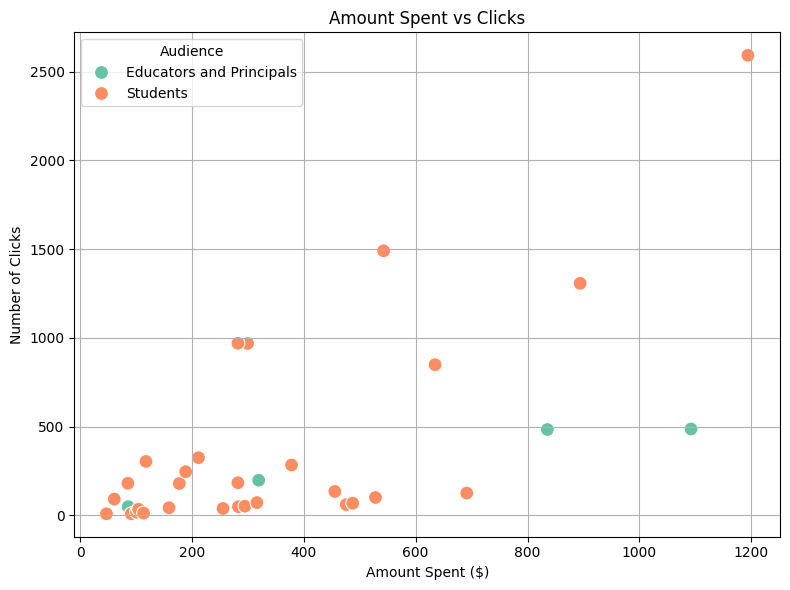

The scatter plot of Amount Spent vs. Clicks shows the relationship between how much money was spent on an ad and how many people clicked on it. From the plot, we can see that higher spending does not always guarantee more clicks. In fact, some ads with lower spending received a large number of clicks, while some high-spending ads performed poorly. When comparing audience types, ads targeting Students (orange dots) generally performed better than those targeting Educators and Principals (green dots). Student ads had higher click numbers even with moderate or low spending. One standout ad targeting Students had the highest number of clicks (over 2500) with around $1200 spent. Overall, this analysis shows that effective targeting and content matter more than just spending more money.


In [8]:
# Clean the 'Amount Spent in INR' column (remove $ and convert to float)
df["Amount Spent ($)"] = df["Amount Spent in INR"].replace('[\$,]', '', regex=True).astype(float)

# Scatter Plot: Amount Spent vs Clicks
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="Amount Spent ($)", y="Clicks", hue="Audience", palette="Set2", s=100)
plt.title("Amount Spent vs Clicks")
plt.xlabel("Amount Spent ($)")
plt.ylabel("Number of Clicks")
plt.grid(True)
plt.tight_layout()
plt.show()
print("""The scatter plot of Amount Spent vs. Clicks shows the relationship between how much money was spent on an ad and how many people clicked on it. From the plot, we can see that higher spending does not always guarantee more clicks. In fact, some ads with lower spending received a large number of clicks, while some high-spending ads performed poorly. When comparing audience types, ads targeting Students (orange dots) generally performed better than those targeting Educators and Principals (green dots). Student ads had higher click numbers even with moderate or low spending. One standout ad targeting Students had the highest number of clicks (over 2500) with around $1200 spent. Overall, this analysis shows that effective targeting and content matter more than just spending more money.""")

# 4. CPC by Audience Type (Boxplot):
This boxplot compares the Cost Per Click (CPC) between two main audience types: Students and Educators & Principals. It shows which group was cheaper or more expensive to engage. A lower CPC indicates more cost-effective advertising for that group.

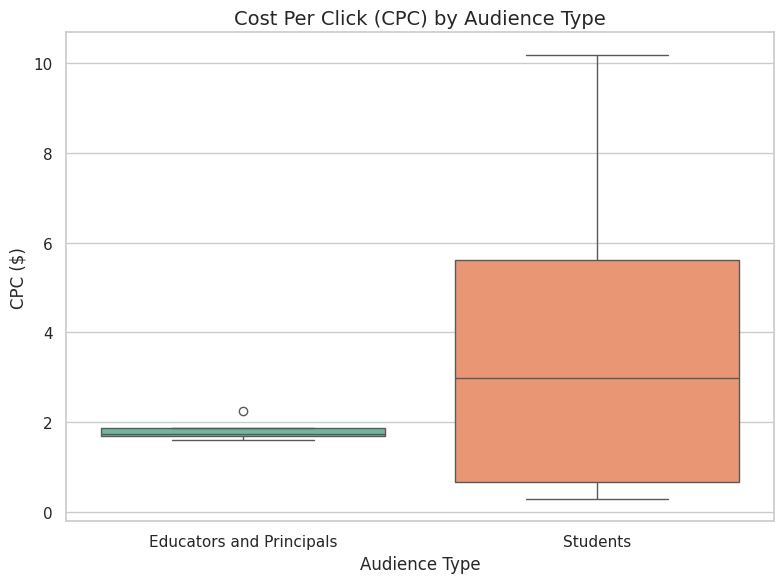

This boxplot shows us how much it generally costs to get a click (Cost Per Click or CPC) for two different groups of people: "Educators and Principals" and "Students."

For "Educators and Principals," the box is very narrow and low, meaning the CPC for this group is consistently low, generally staying around $1.50 to $2.00 per click. There's only one dot higher up, indicating a rare instance where the CPC was a bit higher, around $2.25. This tells us that advertising to "Educators and Principals" is usually quite cheap.

On the other hand, for "Students," the box is much wider and higher. This means the CPC for students varies a lot more and is generally much higher. The typical cost for a click from a student ranges roughly from about $0.50 to $5.50, with the average (the line in the middle of the box) being around $3.00. The long line extending upwards from the box indicates that sometimes, it can cost as much as $10.00 or even more to get a single click from a student.

In simple te

In [9]:
# Ensure CPC is numeric (remove $ if not already done)
df['Cost Per Click (CPC)'] = df['Cost Per Click (CPC)'].replace('[\$,]', '', regex=True).astype(float)

# Set the style
sns.set(style="whitegrid")

# Plotting the boxplot
plt.figure(figsize=(8,6))
sns.boxplot(x='Audience', y='Cost Per Click (CPC)', data=df, palette='Set2')

plt.title('Cost Per Click (CPC) by Audience Type', fontsize=14)
plt.xlabel('Audience Type')
plt.ylabel('CPC ($)')
plt.tight_layout()
plt.show()
print("""This boxplot shows us how much it generally costs to get a click (Cost Per Click or CPC) for two different groups of people: "Educators and Principals" and "Students."

For "Educators and Principals," the box is very narrow and low, meaning the CPC for this group is consistently low, generally staying around $1.50 to $2.00 per click. There's only one dot higher up, indicating a rare instance where the CPC was a bit higher, around $2.25. This tells us that advertising to "Educators and Principals" is usually quite cheap.

On the other hand, for "Students," the box is much wider and higher. This means the CPC for students varies a lot more and is generally much higher. The typical cost for a click from a student ranges roughly from about $0.50 to $5.50, with the average (the line in the middle of the box) being around $3.00. The long line extending upwards from the box indicates that sometimes, it can cost as much as $10.00 or even more to get a single click from a student.

In simple terms, it's generally much more expensive and unpredictable to get clicks from "Students" compared to "Educators and Principals," where the cost per click is consistently low.""")

# 5. Impressions vs. Clicks (Scatter Plot):
This scatter plot explores whether more impressions (ad views) lead to more clicks. It helps us understand if simply showing the ad more times increases user interaction, or if other factors (like content or targeting) are more important.

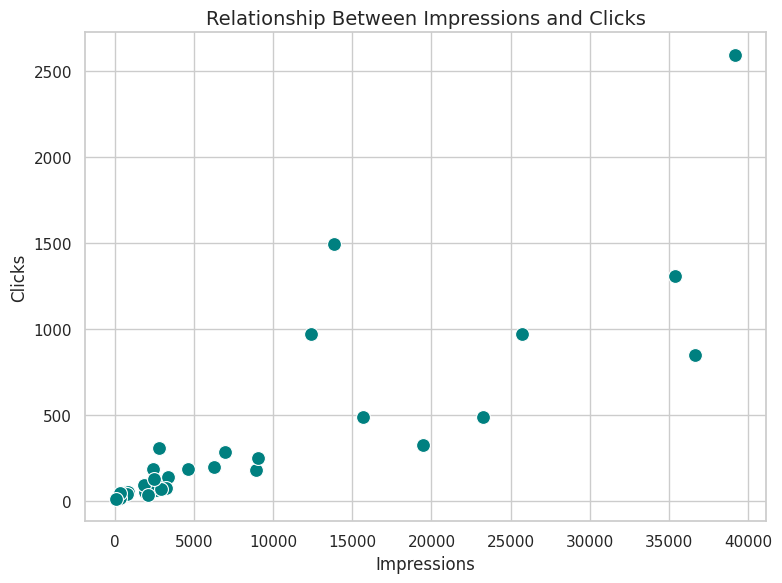

The scatter plot shows the relationship between how many times an ad was shown to people (Impressions) and how many times people actually clicked on it (Clicks). From the chart, we can understand that showing an ad more times can sometimes lead to more clicks, but not always. For example, some ads with very high impressions, like 35,000 to 40,000, received a high number of clicks—over 1000 or even 2500. However, there are also ads with 20,000 to 25,000 impressions that received fewer than 500 clicks. Interestingly, one ad with only about 14,000 impressions still got around 1500 clicks, which means it performed better even with fewer views. This tells us that while impressions are important, they are not the only reason people click on ads. Other factors like the quality of the ad, the target audience, and how relevant or attractive the ad is also play a big role in getting clicks.


In [10]:
# Set style
sns.set(style="whitegrid")

# Plotting the scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='Impressions', y='Clicks', data=df, color='teal', s=100)

plt.title('Relationship Between Impressions and Clicks', fontsize=14)
plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.tight_layout()
plt.show()
print("""The scatter plot shows the relationship between how many times an ad was shown to people (Impressions) and how many times people actually clicked on it (Clicks). From the chart, we can understand that showing an ad more times can sometimes lead to more clicks, but not always. For example, some ads with very high impressions, like 35,000 to 40,000, received a high number of clicks—over 1000 or even 2500. However, there are also ads with 20,000 to 25,000 impressions that received fewer than 500 clicks. Interestingly, one ad with only about 14,000 impressions still got around 1500 clicks, which means it performed better even with fewer views. This tells us that while impressions are important, they are not the only reason people click on ads. Other factors like the quality of the ad, the target audience, and how relevant or attractive the ad is also play a big role in getting clicks.""")